
## 1. Import Required Libraries


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)



## 2. Load Dataset


In [44]:
df = pd.read_csv(r'jobs_indeed.csv')
df.head()

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Company_Rating,Job_URL
0,data analyst,Online Data Analyst - Gujarati Speakers,Contractual / Temporary,TELUS Communications,Maharashtra•Remote,NaN,NaN,NaN,NaN,"R, Machine Learning",NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,data analyst,Online Data Analyst - Urdu Speakers,NaN,TELUS Communications,"Hyderabad, Telangana•Remote",NaN,NaN,NaN,NaN,"R, Machine Learning",NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,data analyst,Financial Analyst,NaN,Bolla Oil Corp,"Kondapur, Hyderabad, Telangana",NaN,NaN,5.0,5.0,"R, SQL, Power BI, Tableau, Excel",NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,data analyst,BI&A Analyst,NaN,Boston Consulting Group,"Gurugram, Haryana",NaN,NaN,6.0,6.0,"R, Power BI, Tableau, Excel, AWS",NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,data analyst,Associate Analyst- GBS,NaN,The Hackett Group,"Hyderabad, Telangana",NaN,NaN,NaN,NaN,"R, Excel",NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...



## 3. Understand the Data


In [45]:
df.shape

(3000, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Keyword            3000 non-null   object 
 1   Job_Title          3000 non-null   object 
 2   Job_type           2118 non-null   object 
 3   Company            2907 non-null   object 
 4   Location           3000 non-null   object 
 5   Salary_Min_Yearly  498 non-null    float64
 6   Salary_Max_Yearly  498 non-null    float64
 7   Experience_Min     1438 non-null   float64
 8   Experience_Max     1438 non-null   float64
 9   Skills             3000 non-null   object 
 10  Company_Rating     0 non-null      float64
 11  Job_URL            3000 non-null   object 
dtypes: float64(5), object(7)
memory usage: 281.4+ KB


In [47]:
df = df.drop('Company_Rating', axis=1)

In [48]:
df.head()

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Job_URL
0,data analyst,Online Data Analyst - Gujarati Speakers,Contractual / Temporary,TELUS Communications,Maharashtra•Remote,NaN,NaN,NaN,NaN,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,data analyst,Online Data Analyst - Urdu Speakers,NaN,TELUS Communications,"Hyderabad, Telangana•Remote",NaN,NaN,NaN,NaN,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,data analyst,Financial Analyst,NaN,Bolla Oil Corp,"Kondapur, Hyderabad, Telangana",NaN,NaN,5.0,5.0,"R, SQL, Power BI, Tableau, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,data analyst,BI&A Analyst,NaN,Boston Consulting Group,"Gurugram, Haryana",NaN,NaN,6.0,6.0,"R, Power BI, Tableau, Excel, AWS",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,data analyst,Associate Analyst- GBS,NaN,The Hackett Group,"Hyderabad, Telangana",NaN,NaN,NaN,NaN,"R, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [49]:
df.describe(include='all')

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Job_URL
count,3000,3000,2118,2907,3000,4.980000e+02,4.980000e+02,1438.000000,1438.000000,3000,3000
unique,14,1355,68,262,83,NaN,NaN,NaN,NaN,302,3000
top,machine learning engineer,Data Engineer,Full-time,Boston Consulting Group,"Bengaluru, Karnataka",NaN,NaN,NaN,NaN,R,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
freq,400,135,1180,133,540,NaN,NaN,NaN,NaN,173,1
mean,NaN,NaN,NaN,NaN,NaN,6.472169e+05,9.662892e+05,8.492350,9.166898,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.674937e+05,8.459071e+05,18.335226,18.188489,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+05,1.200000e+05,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000e+05,4.668000e+05,3.000000,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000e+05,7.000000e+05,5.000000,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.400000e+05,1.100000e+06,8.000000,8.000000,NaN,NaN



## 4. Data Quality Checks


In [50]:
# Missing values
df.isnull().sum()

Keyword                 0
Job_Title               0
Job_type              882
Company                93
Location                0
Salary_Min_Yearly    2502
Salary_Max_Yearly    2502
Experience_Min       1562
Experience_Max       1562
Skills                  0
Job_URL                 0
dtype: int64

In [51]:
# Duplicate rows
df.duplicated().sum()

np.int64(0)


## 5. Remove Duplicates


In [52]:
df = df.drop_duplicates()
df.shape


(3000, 11)


## 6. Handle Missing Values


In [53]:
# Drop rows where Job Title or Company is missing
df = df.dropna(subset=['Job_Title', 'Company'])
df.isnull().sum()

Keyword                 0
Job_Title               0
Job_type              836
Company                 0
Location                0
Salary_Min_Yearly    2426
Salary_Max_Yearly    2426
Experience_Min       1487
Experience_Max       1487
Skills                  0
Job_URL                 0
dtype: int64


## 7. Clean Text Columns


In [54]:
text_cols = ['Job_Title', 'Company', 'Location']

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
df.head()

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Job_URL
0,data analyst,online data analyst - gujarati speakers,Contractual / Temporary,telus communications,maharashtra•remote,NaN,NaN,NaN,NaN,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,data analyst,online data analyst - urdu speakers,NaN,telus communications,"hyderabad, telangana•remote",NaN,NaN,NaN,NaN,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,data analyst,financial analyst,NaN,bolla oil corp,"kondapur, hyderabad, telangana",NaN,NaN,5.0,5.0,"R, SQL, Power BI, Tableau, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,data analyst,bi&a analyst,NaN,boston consulting group,"gurugram, haryana",NaN,NaN,6.0,6.0,"R, Power BI, Tableau, Excel, AWS",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,data analyst,associate analyst- gbs,NaN,the hackett group,"hyderabad, telangana",NaN,NaN,NaN,NaN,"R, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [55]:
# Keep only rows where Keyword is not 'other'
df = df[df['Keyword'] != 'other'].reset_index(drop=True)


## 8. Salary Preprocessing


In [56]:
def extract_salary_yearly(text):
    if pd.isna(text):
        return np.nan, np.nan

    text = str(text).lower()

    numbers = re.findall(r'\d+', text.replace(',', ''))
    numbers = list(map(int, numbers))

    if not numbers:
        return np.nan, np.nan

    # Monthly salary convert to yearly
    if 'month' in text:
        numbers = [n * 12 for n in numbers]

    # Yearly salary keep as is
    elif 'year' in text or 'annum' in text:
        numbers = numbers

    # Single value salary
    if len(numbers) == 1:
        return numbers[0], numbers[0]

    # Salary range
    return min(numbers), max(numbers)

In [57]:
df[['Salary_Min_Yearly', 'Salary_Max_Yearly']] = (
    df['Job_type']
    .apply(lambda x: pd.Series(extract_salary_yearly(x)))
)

In [58]:
df[['Job_type', 'Salary_Min_Yearly', 'Salary_Max_Yearly']].head(5)

,Job_type,Salary_Min_Yearly,Salary_Max_Yearly
0,Contractual / Temporary,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [59]:
df['Keyword'].unique()

array(['data analyst', 'data scientist', 'machine learning engineer',
       'deep learning engineer', 'ai engineer', 'python developer',
       'java developer', 'big data engineer', 'cloud engineer',
       'data engineer', 'analytics consultant',
       'business intelligence developer', 'r programmer',
       'statistical analyst'], dtype=object)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Keyword            2907 non-null   object 
 1   Job_Title          2907 non-null   object 
 2   Job_type           2071 non-null   object 
 3   Company            2907 non-null   object 
 4   Location           2907 non-null   object 
 5   Salary_Min_Yearly  698 non-null    float64
 6   Salary_Max_Yearly  698 non-null    float64
 7   Experience_Min     1420 non-null   float64
 8   Experience_Max     1420 non-null   float64
 9   Skills             2907 non-null   object 
 10  Job_URL            2907 non-null   object 
dtypes: float64(4), object(7)
memory usage: 249.9+ KB


In [61]:
# converting NULL values to 'zero'
salary_cols = ['Salary_Min_Yearly', 'Salary_Max_Yearly']
for col in salary_cols:
    df[col] = df[col].fillna(0)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Keyword            2907 non-null   object 
 1   Job_Title          2907 non-null   object 
 2   Job_type           2071 non-null   object 
 3   Company            2907 non-null   object 
 4   Location           2907 non-null   object 
 5   Salary_Min_Yearly  2907 non-null   float64
 6   Salary_Max_Yearly  2907 non-null   float64
 7   Experience_Min     1420 non-null   float64
 8   Experience_Max     1420 non-null   float64
 9   Skills             2907 non-null   object 
 10  Job_URL            2907 non-null   object 
dtypes: float64(4), object(7)
memory usage: 249.9+ KB


In [63]:
df.head()

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Job_URL
0,data analyst,online data analyst - gujarati speakers,Contractual / Temporary,telus communications,maharashtra•remote,0.0,0.0,NaN,NaN,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,data analyst,online data analyst - urdu speakers,NaN,telus communications,"hyderabad, telangana•remote",0.0,0.0,NaN,NaN,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,data analyst,financial analyst,NaN,bolla oil corp,"kondapur, hyderabad, telangana",0.0,0.0,5.0,5.0,"R, SQL, Power BI, Tableau, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,data analyst,bi&a analyst,NaN,boston consulting group,"gurugram, haryana",0.0,0.0,6.0,6.0,"R, Power BI, Tableau, Excel, AWS",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,data analyst,associate analyst- gbs,NaN,the hackett group,"hyderabad, telangana",0.0,0.0,NaN,NaN,"R, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


## Job type preprocessing

In [64]:
# Define allowed job types
allowed_job_types = [
    'full-time', 'part-time', 'permanent', 'contractual', 'internship', 'fresher'
]

# Function to clean Job_type column
def clean_job_type(text):
    if pd.isna(text):
        return None
    text_lower = str(text).lower()
    for i in allowed_job_types:
        if i in text_lower:
            return i  # keep allowed job type
    return None  # replace everything else (like salaries) with None

# Apply to dataframe
df['Job_type'] = df['Job_type'].apply(clean_job_type)

# check results
df['Job_type'].value_counts(dropna=False)

Job_type
None           1549
full-time      1180
permanent       109
internship       33
part-time        15
fresher          15
contractual       6
Name: count, dtype: int64

In [65]:
# Replace NaN with 'full-time' in 'Job_type' column
df['Job_type'] = df['Job_type'].fillna('Not-Mentioned')

In [66]:
df['Job_type'].value_counts(dropna=False)

Job_type
Not-Mentioned    1549
full-time        1180
permanent         109
internship         33
part-time          15
fresher            15
contractual         6
Name: count, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Keyword            2907 non-null   object 
 1   Job_Title          2907 non-null   object 
 2   Job_type           2907 non-null   object 
 3   Company            2907 non-null   object 
 4   Location           2907 non-null   object 
 5   Salary_Min_Yearly  2907 non-null   float64
 6   Salary_Max_Yearly  2907 non-null   float64
 7   Experience_Min     1420 non-null   float64
 8   Experience_Max     1420 non-null   float64
 9   Skills             2907 non-null   object 
 10  Job_URL            2907 non-null   object 
dtypes: float64(4), object(7)
memory usage: 249.9+ KB


## Experience Preprocessing

In [68]:
df['Experience_Min'].value_counts(dropna=False)

Experience_Min
NaN      1487
5.0       273
3.0       192
2.0       189
6.0       145
10.0      122
8.0        95
1.0        90
4.0        67
12.0       55
0.0        45
7.0        37
9.0        18
25.0       15
24.0       15
60.0       15
80.0       15
155.0      15
16.0       15
30.0        1
90.0        1
Name: count, dtype: int64

In [69]:
df['Experience_Max'].value_counts(dropna=False)

Experience_Max
NaN      1487
5.0       267
3.0       238
6.0       177
8.0       112
10.0      108
2.0       107
4.0        98
12.0       69
7.0        69
9.0        33
1.0        33
14.0       15
25.0       15
24.0       15
60.0       15
80.0       15
155.0      15
16.0       15
15.0        2
30.0        1
90.0        1
Name: count, dtype: int64

In [70]:
# Columns to fix
experience_cols = ['Experience_Min', 'Experience_Max']

for col in experience_cols:
    # Compute median ignoring values > 20 and NaN
    median_val = df.loc[df[col].notna() & (df[col] <= 20), col].median()
    
    # Replace values > 20 or NaN with the median
    df[col] = df[col].apply(lambda x: median_val if pd.isna(x) or x > 20 else x)

In [71]:
df

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Job_URL
0,data analyst,online data analyst - gujarati speakers,contractual,telus communications,maharashtra•remote,0.0,0.0,5.0,5.0,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,data analyst,online data analyst - urdu speakers,Not-Mentioned,telus communications,"hyderabad, telangana•remote",0.0,0.0,5.0,5.0,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,data analyst,financial analyst,Not-Mentioned,bolla oil corp,"kondapur, hyderabad, telangana",0.0,0.0,5.0,5.0,"R, SQL, Power BI, Tableau, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,data analyst,bi&a analyst,Not-Mentioned,boston consulting group,"gurugram, haryana",0.0,0.0,6.0,6.0,"R, Power BI, Tableau, Excel, AWS",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,data analyst,associate analyst- gbs,Not-Mentioned,the hackett group,"hyderabad, telangana",0.0,0.0,5.0,5.0,"R, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
...,...,...,...,...,...,...,...,...,...,...,...
2902,statistical analyst,senior machine learning,Not-Mentioned,aceis services pvt ltd,remote,1000000.0,3000000.0,5.0,5.0,R,https://in.indeed.com/rc/clk?jk=252b331a7b56a0...
2903,statistical analyst,decision analytics associate consultant - rwd,Not-Mentioned,aceis services pvt ltd,remote,1000000.0,3000000.0,5.0,5.0,R,https://in.indeed.com/rc/clk?jk=9440a97424c2b3...
2904,statistical analyst,quantitative analyst ii,Not-Mentioned,aceis services pvt ltd,remote,1000000.0,3000000.0,5.0,5.0,R,https://in.indeed.com/rc/clk?jk=925b3cc4d6c949...
2905,statistical analyst,data analyst i,Not-Mentioned,aceis services pvt ltd,remote,1000000.0,3000000.0,5.0,5.0,R,https://in.indeed.com/rc/clk?jk=b7e6f150328396...


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Keyword            2907 non-null   object 
 1   Job_Title          2907 non-null   object 
 2   Job_type           2907 non-null   object 
 3   Company            2907 non-null   object 
 4   Location           2907 non-null   object 
 5   Salary_Min_Yearly  2907 non-null   float64
 6   Salary_Max_Yearly  2907 non-null   float64
 7   Experience_Min     2907 non-null   float64
 8   Experience_Max     2907 non-null   float64
 9   Skills             2907 non-null   object 
 10  Job_URL            2907 non-null   object 
dtypes: float64(4), object(7)
memory usage: 249.9+ KB


In [73]:
df['Job_Title'].unique()

array(['online data analyst - gujarati speakers',
       'online data analyst - urdu speakers', 'financial analyst', ...,
       'quantitative analyst ii', 'data analyst i',
       'quant analyst intern'], shape=(1298,), dtype=object)

In [74]:
df['Job_Title'].value_counts(dropna=False)

Job_Title
data engineer                           136
python developer                        104
data analyst                             89
java developer                           67
ai engineer                              62
                                       ... 
data engineer i, ap analytics             1
data engineer (informatica)               1
python backend engineer - agentic ai      1
software developer 2                      1
quant analyst intern                      1
Name: count, Length: 1298, dtype: int64

## Save to CSV

In [76]:
df.to_csv("Indeed.com_job_posts_cleaned.csv", index = False)


## 9. Feature Engineering


In [75]:
df.head()

,Keyword,Job_Title,Job_type,Company,Location,Salary_Min_Yearly,Salary_Max_Yearly,Experience_Min,Experience_Max,Skills,Job_URL
0,data analyst,online data analyst - gujarati speakers,contractual,telus communications,maharashtra•remote,0.0,0.0,5.0,5.0,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,data analyst,online data analyst - urdu speakers,Not-Mentioned,telus communications,"hyderabad, telangana•remote",0.0,0.0,5.0,5.0,"R, Machine Learning",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,data analyst,financial analyst,Not-Mentioned,bolla oil corp,"kondapur, hyderabad, telangana",0.0,0.0,5.0,5.0,"R, SQL, Power BI, Tableau, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,data analyst,bi&a analyst,Not-Mentioned,boston consulting group,"gurugram, haryana",0.0,0.0,6.0,6.0,"R, Power BI, Tableau, Excel, AWS",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,data analyst,associate analyst- gbs,Not-Mentioned,the hackett group,"hyderabad, telangana",0.0,0.0,5.0,5.0,"R, Excel",https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...



## 10. Business Questions



### Q1: Which job role has the highest average salary?


In [77]:

df.groupby('Keyword')['Salary_Max_Yearly'].mean().sort_values(ascending=False)


Keyword
ai engineer                        735176.470588
business intelligence developer    424069.898990
machine learning engineer          362212.380952
java developer                     272972.972973
data scientist                     216600.000000
statistical analyst                213517.500000
deep learning engineer             176814.900000
data engineer                      127808.320000
data analyst                       124864.864865
r programmer                       116756.756757
big data engineer                   97500.000000
cloud engineer                      90000.000000
python developer                    72409.945946
analytics consultant                41250.000000
Name: Salary_Max_Yearly, dtype: float64


### Q2: Which location has the highest number of job postings?


In [78]:
df['Location'].value_counts().head(10)

Location
bengaluru, karnataka                525
remote                              268
gurugram, haryana                   254
chennai, tamil nadu                 220
hyderabad, telangana                204
india                               139
pune, maharashtra                    82
bengaluru, karnataka•hybrid work     65
mumbai, maharashtra                  63
noida, uttar pradesh                 62
Name: count, dtype: int64


### Q3: Top hiring companies


In [79]:
df['Company'].value_counts().head(10)

Company
boston consulting group              133
tata consultancy services             65
sanofi eu                             59
accenture                             49
maruti suzuki india ltd               45
nagarro                               36
infobyd software solution pvt ltd     31
saaki argus & averil consulting       31
oracle                                30
concentrix                            30
Name: count, dtype: int64


## 11. Visualization 


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"Indeed.com_job_posts_cleaned.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

### 1. Job Demand Visualization

C:\Users\Darshanam Vamshi\AppData\Local\Temp\ipykernel_15164\1812766247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


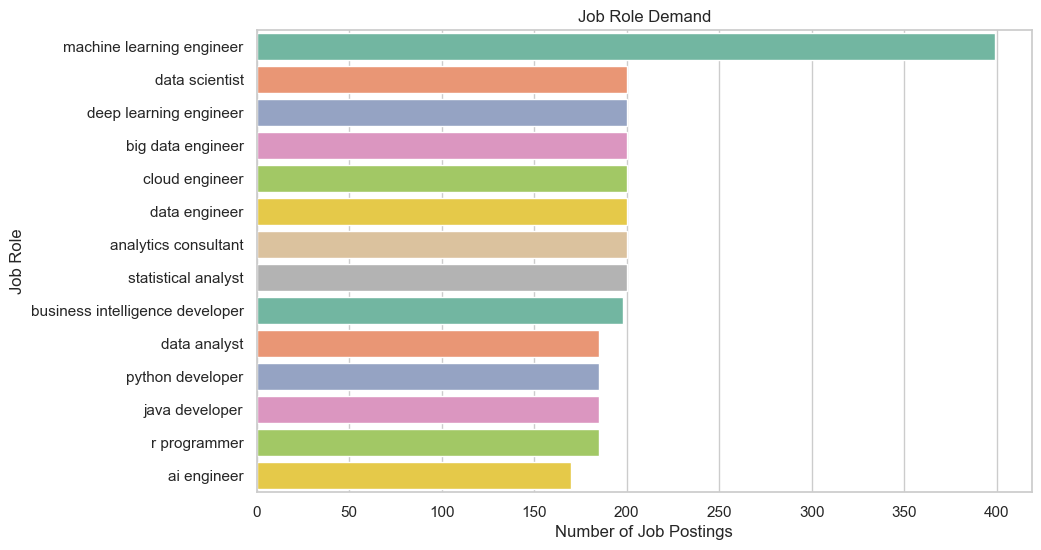

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y="Keyword",
    order=df["Keyword"].value_counts().index,
    palette="Set2"
)

plt.title("Job Role Demand")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Role")
plt.show()


### Insight: 
* This shows which roles are currently most in-demand.
* Data Engineer and Data Analyst are Most in-demand job roles

### 2. Salary Analysis by Job Role

<Figure size 600x600 with 0 Axes>

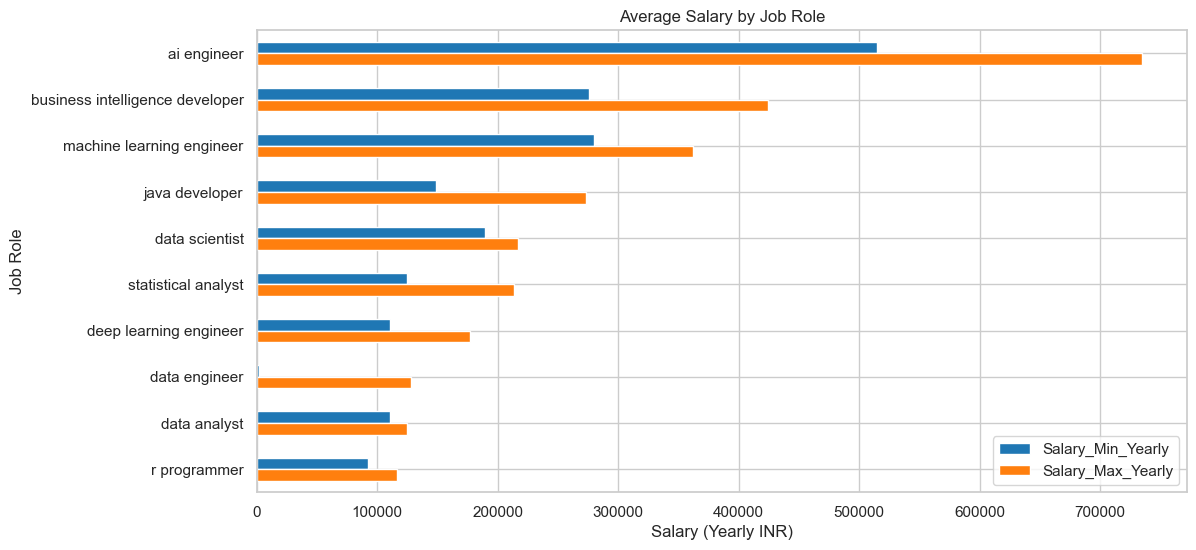

In [132]:
import matplotlib.pyplot as plt

avg_salary_role = df.groupby('Keyword')[['Salary_Min_Yearly','Salary_Max_Yearly']].mean().sort_values('Salary_Max_Yearly', ascending=False).head(10)

plt.figure(figsize=(6,6))

# Horizontal bar chart
avg_salary_role.plot(
    kind='barh',
    stacked=False,
    color=['#1f77b4','#ff7f0e']
)

plt.xlabel("Salary (Yearly INR)")
plt.ylabel("Job Role")
plt.title("Average Salary by Job Role")
plt.gca().invert_yaxis()  # Optional: show highest salary on top
plt.show()


### Insight: 
* Identify which roles pay the highest on average.
* Typically, Business Intelligence developer and Machine Learning Engineer'

### 3. Companies Hiring the Most

C:\Users\Darshanam Vamshi\AppData\Local\Temp\ipykernel_15164\1428477301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


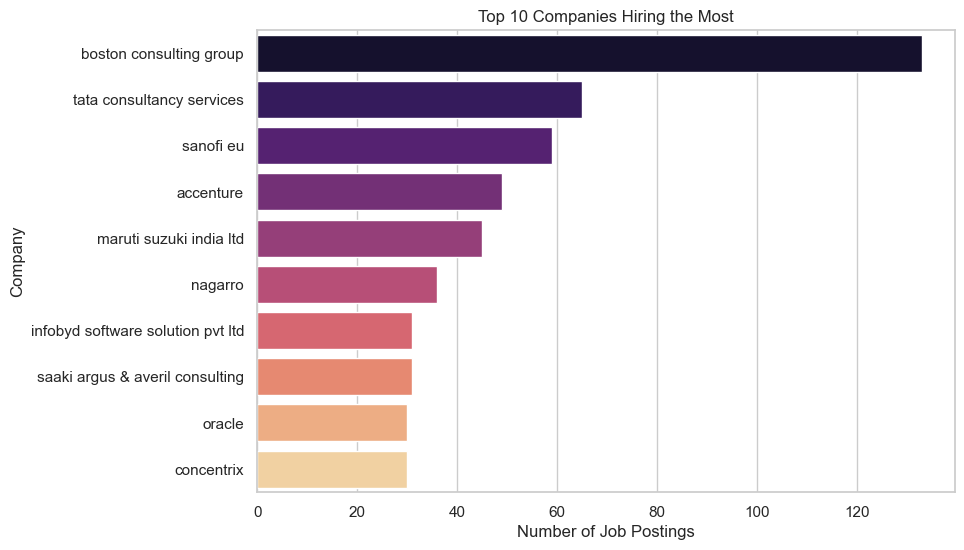

In [34]:
plt.figure(figsize=(9,6))
sns.countplot(
    y='Company',
    data=df,
    order=df['Company'].value_counts().head(10).index,
    palette='magma'
)

plt.title("Top 10 Companies Hiring the Most")
plt.xlabel("Number of Job Postings")
plt.ylabel("Company")
plt.show()


C:\Users\Darshanam Vamshi\AppData\Local\Temp\ipykernel_15164\4288885437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


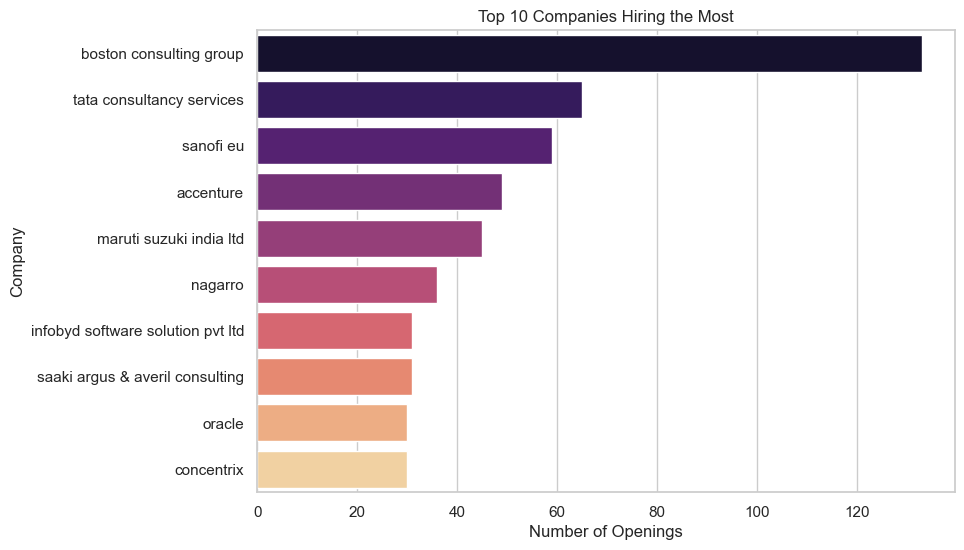

In [35]:
top_companies = df['Company'].value_counts().head(10)

plt.figure(figsize=(9,6))
sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    palette='magma'
)

plt.title("Top 10 Companies Hiring the Most")
plt.xlabel("Number of Openings")
plt.ylabel("Company")
plt.show()


### Insight: 
* Shows which companies are actively hiring multiple roles

### 4. Skills in Demand

C:\Users\Darshanam Vamshi\AppData\Local\Temp\ipykernel_27504\3093260029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.index, y=top_skills.values, palette='coolwarm')


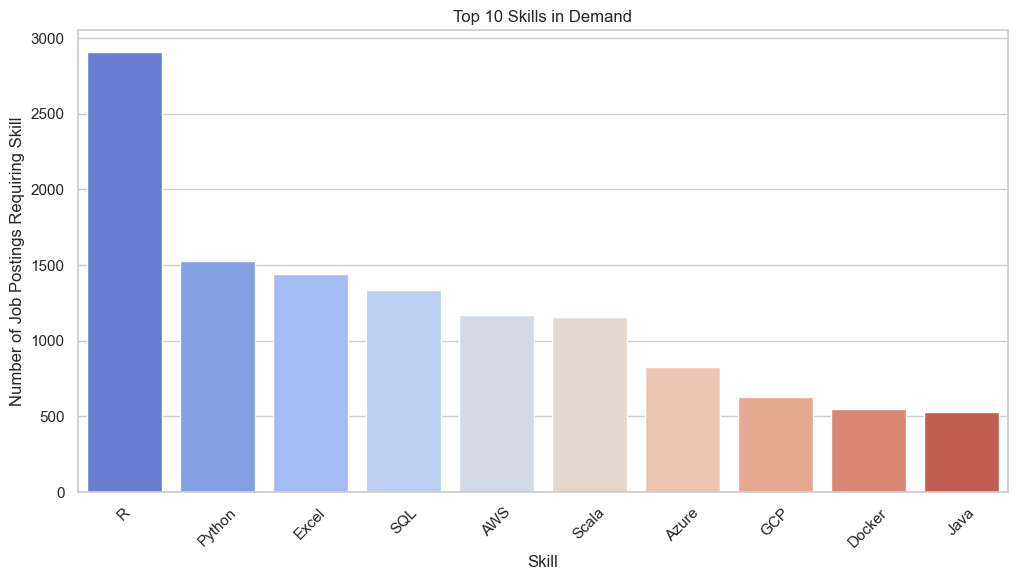

In [98]:
#Exploding skills into rows
skills_expanded = df.assign(Skill=df['Skills'].str.split(',')).explode('Skill')
skills_expanded['Skill'] = skills_expanded['Skill'].str.strip()
top_skills = skills_expanded['Skill'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_skills.index, y=top_skills.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Skills in Demand")
plt.ylabel("Number of Job Postings Requiring Skill")
plt.show()

### Insight: 
* Shows the most requested skills, e.g., ''R','Python', 'SQL', 'Power BI', 'Machine Learning'.

### 5. Job Availability by Location

C:\Users\Darshanam Vamshi\AppData\Local\Temp\ipykernel_27504\3664072953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jobs_location.index, y=jobs_location.values, palette='plasma')


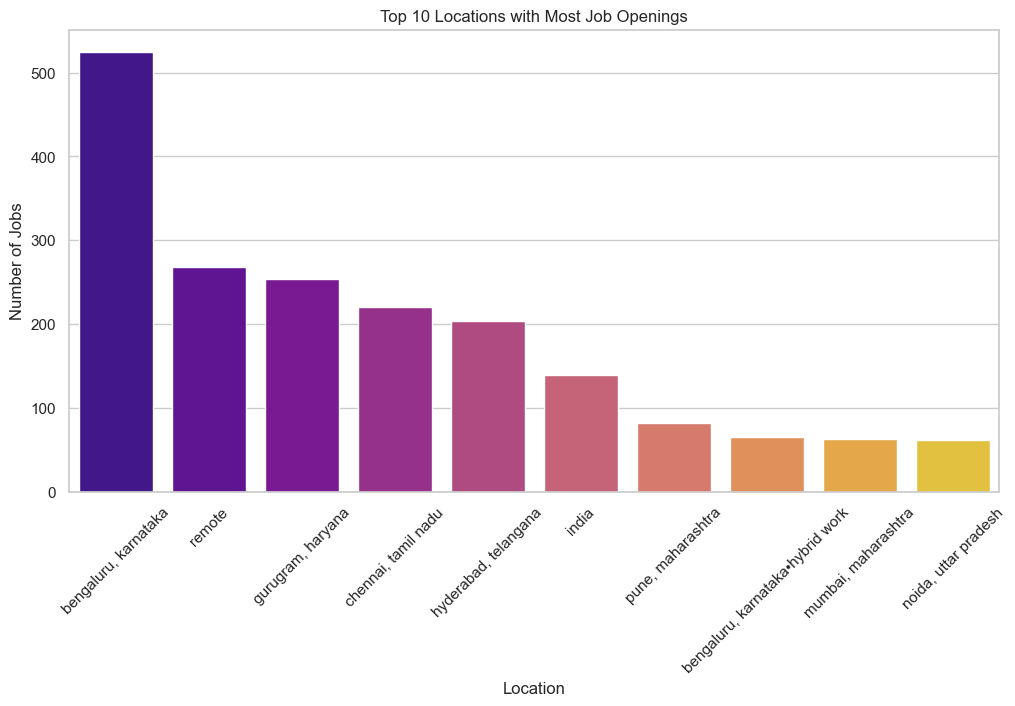

In [99]:
jobs_location = df['Location'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=jobs_location.index, y=jobs_location.values, palette='plasma')
plt.xticks(rotation=45)
plt.title("Top 10 Locations with Most Job Openings")
plt.ylabel("Number of Jobs")
plt.show()

### Insight: 
* Highlights cities with the highest demand, Bangalore, Hyderabad, Pune.


### 6. Salary Comparison Across Locations

<Figure size 1000x600 with 0 Axes>

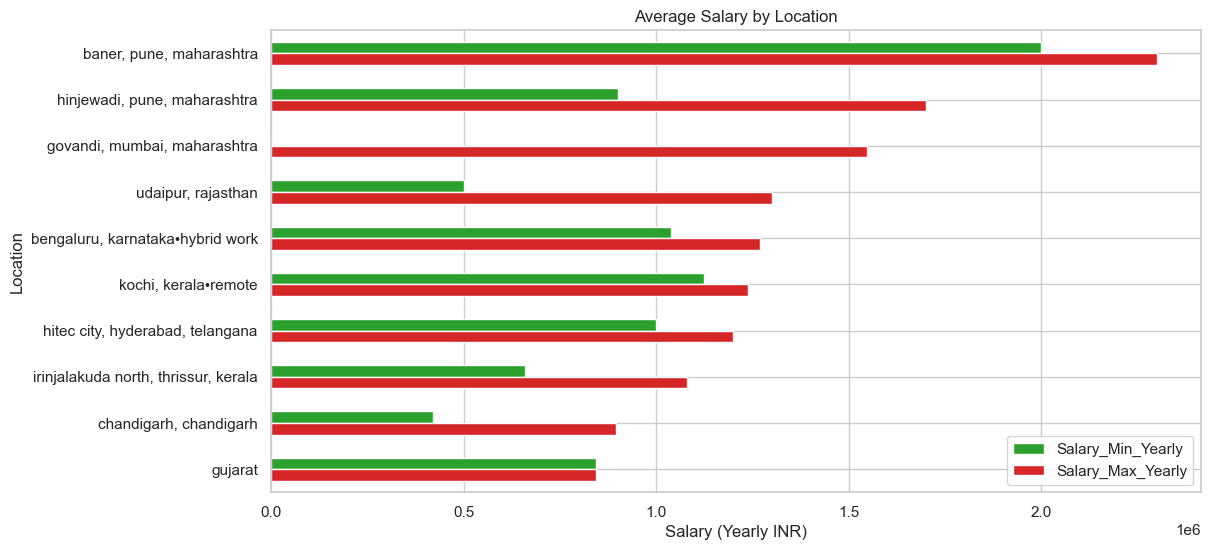

In [19]:
import matplotlib.pyplot as plt

salary_location = (
    df.groupby('Location')[['Salary_Min_Yearly','Salary_Max_Yearly']]
      .mean()
      .sort_values('Salary_Max_Yearly', ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))

salary_location.plot(
    kind='barh',
    stacked=False,
    color=['#2ca02c', '#d62728']
)

plt.xlabel("Salary (Yearly INR)")
plt.ylabel("Location")
plt.title("Average Salary by Location")
plt.gca().invert_yaxis()   # Highest salary at the top
plt.show()


### Insight: 
* Shows where salaries are highest; often metro cities pay more.


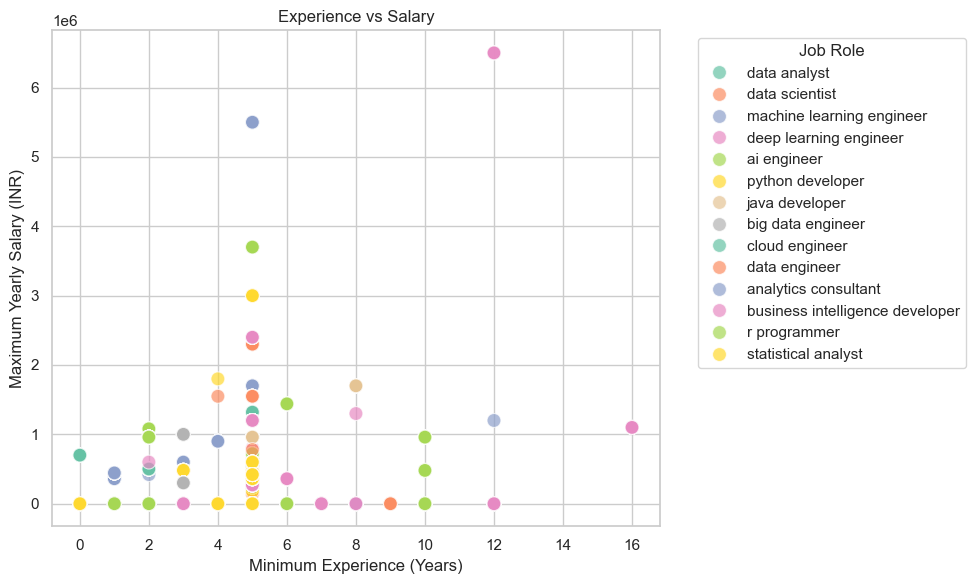

In [28]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="Experience_Min",
    y="Salary_Max_Yearly",
    hue="Keyword",
    palette="Set2",
    s=100,
    alpha=0.7
)

plt.title("Experience vs Salary")
plt.xlabel("Minimum Experience (Years)")
plt.ylabel("Maximum Yearly Salary (INR)")
plt.legend(title="Job Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Interpretation

* Salary increases with experience across all roles.

* AI/ML roles show the steepest salary growth, while traditional developer roles grow more slowly.

* High outliers represent senior, niche, or highly skilled positions.

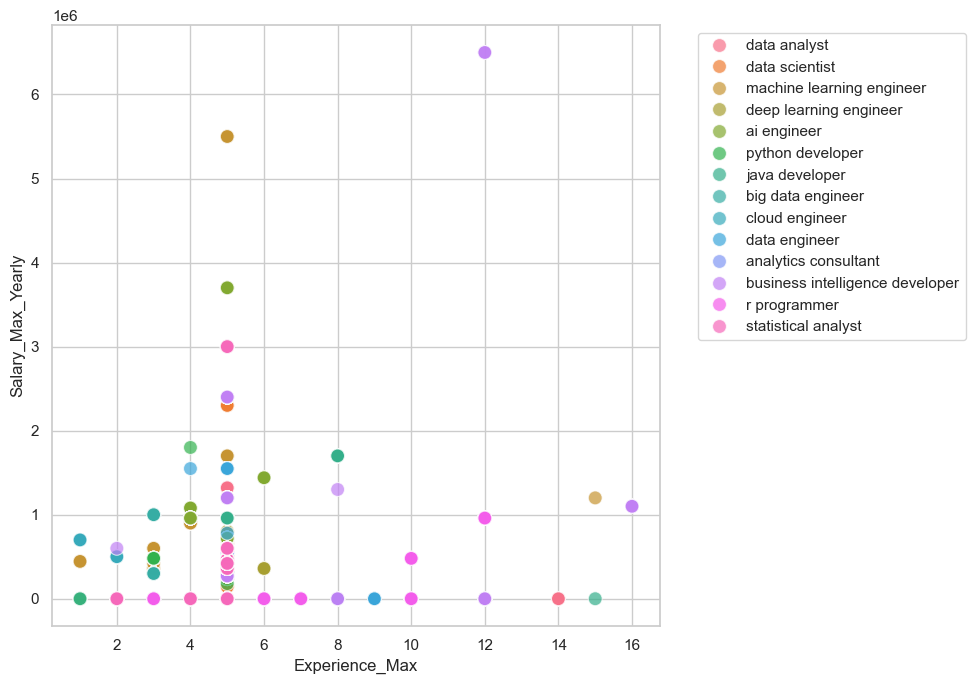

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    df,
    x = 'Experience_Max',
    y = 'Salary_Max_Yearly',
    hue='Keyword',
    s=100,
    alpha=0.7
)

plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()

### Key Insights
- AI, ML, and Cloud roles generally offer higher salaries.

- Entry-level roles may be significantly lower than experienced roles.

- Companies like TCS, Infosys, or Amazon might appear as top recruiters.

- High demand companies are ideal for applications.

- Python, SQL, Power BI, Machine Learning, and Cloud skills dominate.

- Emerging skills like AI, Deep Learning, and Cloud are in growing demand.

- Bangalore, Hyderabad, Pune, and Mumbai usually have the highest job openings.

- Salaries also differ by city; metros often pay more.

# Hypothesis Testing

### Is there a significant salary difference between Data Scientists and Data Analysts?


#### Hypotheses
##### H₀ (Null): Mean salary of Data Scientists = Mean salary of Data Analysts µ(DS)=µ(DA)
##### H₁ (Alternative): Mean salary of Data Scientists ≠ Mean salary of Data Analysts µ(DS)≠µ(DA)
Test Type: Independent T-Test

In [101]:
from scipy.stats import ttest_ind

# Filter roles
ds_salary = df[df["Keyword"] == "data scientist"]["Salary_Max_Yearly"].dropna()
da_salary = df[df["Keyword"] == "data analyst"]["Salary_Max_Yearly"].dropna()

# T-test
t_stat, p_value = ttest_ind(ds_salary, da_salary, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Significant salary difference exists")
else:
    print("Fail to Reject H0: No significant salary difference")


T-statistic: 1.811926313807265
P-value: 0.07089268833115335
Fail to Reject H0: No significant salary difference


#### Do jobs requiring higher experience pay more?

#### Hypotheses
##### H₀: Mean salary for low-experience jobs = high-experience jobs
##### H₁: Mean salary for high-experience jobs > low-experience jobs
Test Type: One-tailed T-Test

In [102]:
# Create experience groups
low_exp = df[df["Experience_Min"] <= 2]["Salary_Max_Yearly"].dropna()
high_exp = df[df["Experience_Min"] >= 5]["Salary_Max_Yearly"].dropna()

t_stat, p_value = ttest_ind(high_exp, low_exp, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Higher experience jobs pay significantly more")
else:
    print("Fail to Reject H0")

T-statistic: 1.7857889834923193
P-value: 0.07451034095842601
Fail to Reject H0


#### Insights:
* No statistically significant difference in mean salaries between low-experience and high-experience jobs at the 5% level.
* While higher-experience jobs tend to have slightly higher salaries (as indicated by the positive T-statistic), the evidence is not strong enough to confirm this conclusively.

* Other factors such as job role, skills required, company, and location may also influence salary, meaning experience alone may not fully determine pay.

C:\Users\Darshanam Vamshi\AppData\Local\Temp\ipykernel_15164\1812766247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


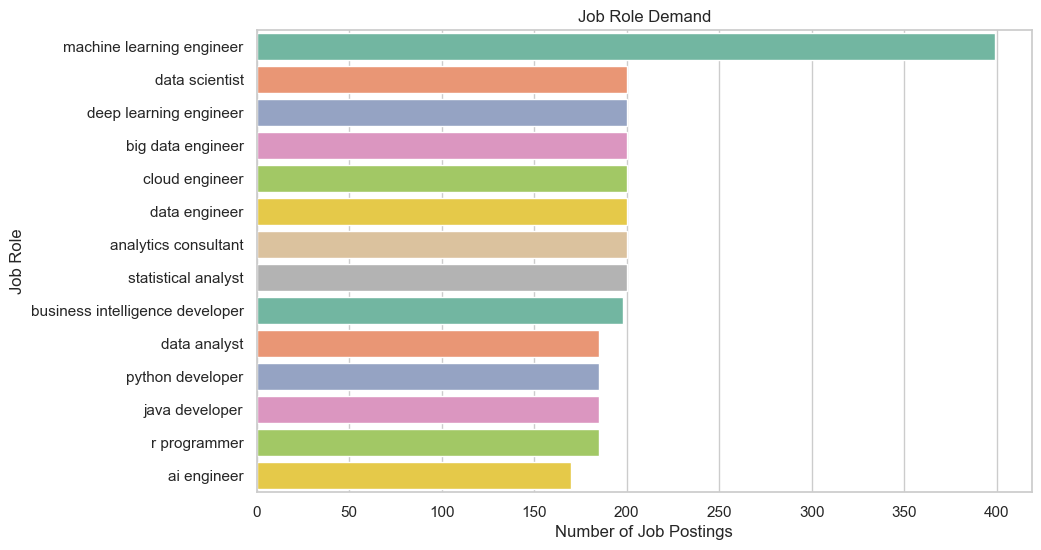

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y="Keyword",
    order=df["Keyword"].value_counts().index,
    palette="Set2"
)

plt.title("Job Role Demand")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Role")
plt.show()
